## Task 2

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# tensorflow version being used
print(tf.__version__) 
# is tf executing eagerly? 
print(tf.executing_eagerly())

2.3.0
True


In [3]:
# load mnist training and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# data shape and cardinality
print('Train data shape', x_train.shape)
print('Test data shape', x_test.shape)

Train data shape (60000, 28, 28)
Test data shape (10000, 28, 28)


In [4]:
print('Number of training samples', x_train.shape[0])
print('Number of testing samples', x_test.shape[0])

Number of training samples 60000
Number of testing samples 10000


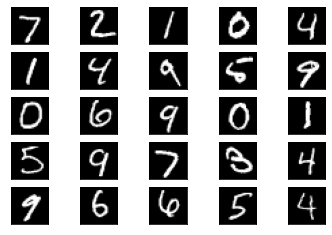

In [5]:
# plotting some numbers!
for i in range(25):
    plt.subplot(5,5,i+1) # add a subplot as 5 x 5
    plt.xticks([]) # get rid of labels
    plt.yticks([]) # get rid of labels
    plt.imshow(x_test[i], cmap="gray")
plt.show()

In [6]:
# reshape the input to have a list of 784 (28*28) and normalize it (/255)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]) 
x_train = x_train.astype('float32')/255
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]) 
x_test = x_test.astype('float32')/255

In [7]:
# building a three-layer sequential model
model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
# compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
# training it
model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2699 - accuracy: 0.9209
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1228 - accuracy: 0.9630
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0908 - accuracy: 0.9719
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0690 - accuracy: 0.9788
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0591 - accuracy: 0.9815
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0477 - accuracy: 0.9846
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0395 - accuracy: 0.9870
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0345 - accuracy: 0.9886
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0298 - accuracy: 0.9899
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.027

In [10]:
# evaluating it
_, test_acc = model.evaluate(x_test, y_test, batch_size=32)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0934 - accuracy: 0.9778

Test accuracy: 0.9778000116348267


In [12]:
# finally, generating predictions (the output of the last layer)
print('\nGenerating predictions for the first fifteen samples...') 
predictions = model.predict(x_test[:15])
print('Predictions shape:', predictions.shape)
for i, prediction in enumerate(predictions):
    # tf.argmax returns the INDEX with the largest value across axes of a tensor
    predicted_value = tf.argmax(prediction)
    #label = TODO
    print('Predicted a %d. Real value is %d.' %(predicted_value, label))

IndentationError: expected an indented block (<ipython-input-12-9e7dafe64f6d>, line 7)